In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from collections import Counter
from itertools import product

In [137]:
#Model Paquetes
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
from lifelines import CoxPHFitter, WeibullAFTFitter
from lifelines.utils import concordance_index
from sksurv.ensemble import RandomSurvivalForest
from sksurv.metrics import concordance_index_censored
from lifelines import KaplanMeierFitter
from sksurv.metrics import brier_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt
from sksurv.util import Surv
from sksurv.ensemble import GradientBoostingSurvivalAnalysis
from sksurv.svm import FastSurvivalSVM
from sklearn.inspection import PartialDependenceDisplay
import shap
from pdpbox import pdp

In [138]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [140]:
base_model = pd.read_csv('/mnt/c/Users/clayt/Data Science/UCM/TFM/Datos/Processed/valencia_model_survival.csv', encoding='latin1')

In [142]:
base_model.head()

,Ano,Mes,capital_log,duration,failure,socio_unico,longitude,latitude,Poblacion_log,Sector A Ratio,Sector B Ratio,Sector C Ratio,Sector D Ratio,Sector E Ratio,Sector F Ratio,Sector G Ratio,Sector H Ratio,Sector I Ratio,Sector J Ratio,Sector K Ratio,Sector L Ratio,Sector M Ratio,Sector N Ratio,Sector O Ratio,Sector P Ratio,Sector Q Ratio,Sector R Ratio,Sector S Ratio,Sector T Ratio,sector_A_density,sector_B_density,sector_C_density,sector_D_density,sector_E_density,sector_F_density,sector_G_density,sector_H_density,sector_I_density,sector_J_density,sector_K_density,sector_L_density,sector_M_density,sector_N_density,sector_O_density,sector_P_density,sector_Q_density,sector_R_density,sector_S_density,sector_T_density,urbano,competitors_500m
0,-1.560878,-1.240431,-0.337142,5.0,0,-1.802146,0.341999,0.307844,1.300018,1.222836,-0.009889,0.574572,-0.096286,-0.052786,-0.443716,1.609396,-0.184477,-0.305215,-0.234199,-0.270024,-0.297104,-0.389095,-0.307724,-0.12151,-0.149733,-0.182609,-0.177145,-0.215415,-0.045438,0.217361,-0.027757,-0.056098,-0.074013,-0.046486,-0.100907,0.006240,-0.056569,-0.067541,-0.09267,-0.103064,-0.085766,-0.122872,-0.062569,-0.036377,-0.035206,-0.060212,-0.034039,-0.04121,-0.014157,1.246418,0.132402
1,-1.560878,-1.240431,-0.337142,5.0,0,0.554894,-0.132199,-1.355234,-0.060522,-0.308062,-0.009889,-0.886108,-0.096286,-0.052786,-0.443716,2.178639,-0.184477,-0.305215,-0.234199,-0.270024,-0.297104,-0.389095,-0.307724,-0.12151,-0.149733,-0.182609,-0.177145,-0.215415,-0.045438,-0.125134,-0.027757,-0.168499,-0.074013,-0.046486,-0.100907,0.024668,-0.056569,-0.067541,-0.09267,-0.103064,-0.085766,-0.122872,-0.062569,-0.036377,-0.035206,-0.060212,-0.034039,-0.04121,-0.014157,-0.802299,0.087377
2,-1.949200,1.751592,-0.337142,5.0,0,0.554894,0.235245,0.248307,1.297611,-0.308062,-0.009889,-0.886108,-0.096286,-0.052786,-0.443716,-0.612648,-0.184477,3.701366,-0.234199,-0.270024,-0.297104,-0.389095,-0.307724,-0.12151,-0.149733,-0.182609,-0.177145,-0.215415,-0.045438,-0.125134,-0.027757,-0.168499,-0.074013,-0.046486,-0.100907,-0.114219,-0.056569,0.259186,-0.09267,-0.103064,-0.085766,-0.122872,-0.062569,-0.036377,-0.035206,-0.060212,-0.034039,-0.04121,-0.014157,1.246418,-0.182770
3,-1.560878,-1.240431,-0.337142,5.0,0,0.554894,0.336295,0.228260,1.300018,-0.308062,-0.009889,-0.886108,-0.096286,-0.052786,2.593015,-0.612648,-0.184477,-0.305215,-0.234199,-0.270024,-0.297104,-0.389095,-0.307724,-0.12151,-0.149733,-0.182609,-0.177145,-0.215415,-0.045438,-0.125134,-0.027757,-0.168499,-0.074013,-0.046486,0.097375,-0.114219,-0.056569,-0.067541,-0.09267,-0.103064,-0.085766,-0.122872,-0.062569,-0.036377,-0.035206,-0.060212,-0.034039,-0.04121,-0.014157,1.246418,-0.160257
4,-1.560878,-1.240431,1.827958,5.0,0,0.554894,-0.144634,0.368954,-0.337327,-0.308062,-0.009889,2.222995,-0.096286,-0.052786,-0.443716,2.066609,-0.184477,-0.305215,-0.234199,-0.270024,-0.297104,3.457161,5.233473,-0.12151,-0.149733,-0.182609,-0.177145,-0.215415,-0.045438,-0.125134,-0.027757,-0.081695,-0.074013,-0.046486,-0.100907,-0.025704,-0.056569,-0.067541,-0.09267,-0.103064,-0.085766,0.080575,0.051684,-0.036377,-0.035206,-0.060212,-0.034039,-0.04121,-0.014157,-0.802299,-0.362868


Encoding:

In [34]:
#categorical_columns = final_data.select_dtypes(include=['object']).columns.tolist()

#Initialize OneHotEncoder
#encoder = OneHotEncoder(sparse_output=False)

# Apply one-hot encoding to the categorical columns
#one_hot_encoded = encoder.fit_transform(final_data[categorical_columns])

#We use get_feature_names_out() to get the column names for the encoded data
#one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns))

# Concatenate the one-hot encoded dataframe with the original dataframe
#final_df = pd.concat([final_data, one_hot_df], axis=1)

# Drop the original categorical columns
#final_df = final_df.drop(categorical_columns, axis=1)

In [143]:
# Assuming `X` is your feature matrix
X = base_model.drop(columns=['duration', 'failure'])

# Add a constant to the features matrix
X = sm.add_constant(X)

# Compute VIF for each feature
vif = pd.DataFrame()
vif['Feature'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
#print(vif)

In [144]:
vif.head(50)

,Feature,VIF
0,const,1.000000
1,Ano,1.071347
2,Mes,1.009165
3,capital_log,1.032912
4,socio_unico,1.007520
5,longitude,1.188086
6,latitude,1.132907
7,Poblacion_log,5.097599
8,Sector A Ratio,1.102515
9,Sector B Ratio,1.149847


In [145]:
low_variance_cols = [col for col in base_model.columns if base_model[col].var() < 1e-5]

In [146]:
print(low_variance_cols)

[]


In [147]:
# Split the data into training and testing sets
X = base_model.drop(columns=['duration', 'failure'])
y_event = base_model['failure'].astype(bool)
y_time = base_model['duration']

# Create a combined target for stratification
stratify_col = y_event

# Split the data with stratification
X_train, X_test, y_train_time, y_test_time, y_train_event, y_test_event = train_test_split(
    X, y_time, y_event, test_size=0.3, random_state=42, stratify=stratify_col
)

# Combine features and target variables
train_data = X_train.copy()
train_data['duration'] = y_train_time
train_data['event'] = y_train_event

test_data = X_test.copy()
test_data['duration'] = y_test_time
test_data['event'] = y_test_event


COX Proportional Hazards Model:

In [148]:
# Fit the Cox model
cph = CoxPHFitter()
cph.fit(train_data, duration_col='duration', event_col='event')
# For CoxPH
c_index_cph = concordance_index_censored(y_test_event, y_test_time, cph.predict_partial_hazard(X_test))[0]
print(f'CoxPH C-index: {c_index_cph:.3f}')


CoxPH C-index: 0.563


Random Survival Forest:

In [19]:
# Prepare survival dataset for RSF
y_train = Surv.from_dataframe('event', 'duration', train_data)
y_test = Surv.from_dataframe('event', 'duration', test_data)

# Initialize and fit RSF model
rsf = RandomSurvivalForest(n_estimators=100, random_state=42)
rsf.fit(X_train, y_train)


RandomSurvivalForest(random_state=42)

In [20]:
# Predictions and Evaluation
rsf_pred = rsf.predict(X_test)
c_index_rsf = concordance_index_censored(y_test['event'], y_test['duration'], rsf_pred)[0]
print(f'RSF C-index: {c_index_rsf:.3f}')

RSF C-index: 0.560


Gradient Boost for Survival

In [158]:
y_train = Surv.from_arrays(event=y_train_event, time=y_train_time)
y_test = Surv.from_arrays(event=y_test_event, time=y_test_time)

# Initialize and train the Gradient Boosting Survival model
gb_surv = GradientBoostingSurvivalAnalysis()

# Fit the model on the training data
gb_surv.fit(X_train, y_train)

GradientBoostingSurvivalAnalysis()

In [159]:
# Predict the risk scores on the test data (higher score = higher risk)
predicted_risk_scores = gb_surv.predict(X_test)

# Compute Concordance Index
c_index = concordance_index_censored(y_test_event, y_test_time, predicted_risk_scores)
print(f"Concordance Index: {c_index[0]}")

Concordance Index: 0.5710210080158021


Survival SVMs

In [61]:
y_train = Surv.from_arrays(event=y_train_event, time=y_train_time)
y_test = Surv.from_arrays(event=y_test_event, time=y_test_time)

# The loss_type can be 'hinge', 'squared_hinge', 'log', etc.
surv_svm = FastSurvivalSVM(rank_ratio=0.1, max_iter=1000, tol=1e-5, random_state=42)
surv_svm.fit(X_train, y_train)

FastSurvivalSVM(max_iter=1000, optimizer='avltree', random_state=42,
                rank_ratio=0.1, tol=1e-05)

In [62]:
# Predict the risk scores on the test data
predicted_risk_scores = surv_svm.predict(X_test)

# Evaluate the model using Concordance Index (C-index)
c_index = concordance_index_censored(y_test_event, y_test_time, predicted_risk_scores)
print(f"Concordance Index: {c_index[0]}")

Concordance Index: 0.43742102496379803


Hyperparameter Tuning:

In [49]:
def evaluate_cph(penalizer, weight, train_data, test_data):
    # Create a copy of the training data to avoid modifying the original dataframe
    train_data_copy = train_data.copy()
    
    # Add weights to the training data
    train_data_copy['weights'] = weight
    
    # Initialize and fit CoxPH model with the robust option
    cph = CoxPHFitter(penalizer=penalizer)
    cph.fit(train_data_copy, duration_col='duration', event_col='event', weights_col='weights', robust=True)
    
    # Predict the partial hazard
    y_pred = cph.predict_partial_hazard(test_data)
    c_index = concordance_index_censored(test_data['event'], test_data['duration'], y_pred)[0]
    
    return c_index

# Grid search manually for best penalizer and weight
penalizer_values = [0.01, 0.1, 1.0, 10.0]
weights_values = [0.5, 1.0, 2.0]

best_c_index = -np.inf
best_penalizer = None
best_weight = None

for penalizer in penalizer_values:
    for weight in weights_values:
        c_index = evaluate_cph(penalizer, weight, train_data, test_data)
        print(f'Penalizer: {penalizer}, Weight: {weight}, C-index: {c_index:.3f}')
        if c_index > best_c_index:
            best_c_index = c_index
            best_penalizer = penalizer
            best_weight = weight

print(f'Best Penalizer: {best_penalizer}, Best Weight: {best_weight}, C-index: {best_c_index:.3f}')


Penalizer: 0.01, Weight: 0.5, C-index: 0.572
Penalizer: 0.01, Weight: 1.0, C-index: 0.570
Penalizer: 0.01, Weight: 2.0, C-index: 0.569
Penalizer: 0.1, Weight: 0.5, C-index: 0.576
Penalizer: 0.1, Weight: 1.0, C-index: 0.575
Penalizer: 0.1, Weight: 2.0, C-index: 0.574
Penalizer: 1.0, Weight: 0.5, C-index: 0.576
Penalizer: 1.0, Weight: 1.0, C-index: 0.576
Penalizer: 1.0, Weight: 2.0, C-index: 0.576
Penalizer: 10.0, Weight: 0.5, C-index: 0.575
Penalizer: 10.0, Weight: 1.0, C-index: 0.575
Penalizer: 10.0, Weight: 2.0, C-index: 0.575
Best Penalizer: 0.1, Best Weight: 0.5, C-index: 0.576


In [50]:
# Fit the best CoxPH model with the best parameters
best_cph = CoxPHFitter(penalizer=best_penalizer)
train_data['weights'] = best_weight
best_cph.fit(train_data, duration_col='duration', event_col='event', weights_col='weights')

# Predict and evaluate
best_cph_pred = best_cph.predict_partial_hazard(X_test)
c_index_best_cph = concordance_index_censored(y_test['event'], y_test['duration'], best_cph_pred)[0]
print(f'Best CoxPH C-index: {c_index_best_cph:.3f}')


/home/claytonfc/ENTER/envs/datasci_env/lib/python3.12/site-packages/lifelines/fitters/coxph_fitter.py:1356: StatisticalWarning: It appears your weights are not integers, possibly propensity or sampling scores then?
It's important to know that the naive variance estimates of the coefficients are biased. Instead a) set `robust=True` in the call to `fit`, or b) use Monte Carlo to
estimate the variances. See paper "Variance estimation when using inverse probability of treatment weighting (IPTW) with survival analysis"

  warnings.warn(


Best CoxPH C-index: 0.576


In [90]:
# Create Surv object from train and test data
y_train = Surv.from_arrays(event=y_train_event, time=y_train_time)
y_test = Surv.from_arrays(event=y_test_event, time=y_test_time)

In [93]:
# Reset index for X_train to match KFold indices
X_train = X_train.reset_index(drop=True)

# Define the hyperparameter grid for Random Survival Forest
param_grid = {
    'n_estimators': [200, 300],           # Number of trees in the forest
    'max_depth': [3, 5, 7],                    # Maximum depth of each tree
    'max_features': ['sqrt', 'log2'],          # Number of features to consider for the best split
    'min_samples_split': [2, 5]                # Minimum number of samples required to split a node
}

# Get all combinations of hyperparameters
param_combinations = list(product(
    param_grid['n_estimators'], 
    param_grid['max_depth'], 
    param_grid['max_features'], 
    param_grid['min_samples_split']
))

def manual_grid_search_cv(X_train, y_train, param_combinations, model_class, k=5):
    best_params = None
    best_c_index = -np.inf

    # Initialize KFold for cross-validation
    kf = KFold(n_splits=k, shuffle=True, random_state=42)

    for params in param_combinations:
        n_estimators, max_depth, max_features, min_samples_split = params
        c_index_list = []

        # Perform K-fold cross-validation
        for train_idx, val_idx in kf.split(X_train):
            # Use train_idx and val_idx to index into X_train and y_train
            X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
            y_train_fold, y_val_fold = y_train[train_idx], y_train[val_idx]

            # Initialize Random Survival Forest with current hyperparameters
            model = model_class(
                n_estimators=n_estimators, 
                max_depth=max_depth, 
                max_features=max_features,
                min_samples_split=min_samples_split,
                random_state=42
            )

            # Fit the model on the training fold
            model.fit(X_train_fold, y_train_fold)

            # Predict on the validation fold (returns survival function, we will take the median prediction)
            y_pred = model.predict(X_val_fold)

            # Calculate the concordance index
            c_index = concordance_index_censored(
                y_val_fold['event'], y_val_fold['time'], y_pred
            )[0]
            c_index_list.append(c_index)

        # Average concordance index across folds
        avg_c_index = np.mean(c_index_list)

        # Check if this is the best score so far
        if avg_c_index > best_c_index:
            best_c_index = avg_c_index
            best_params = params

        print(f"Params: {params}, Average C-Index: {avg_c_index:.4f}")

    return best_params, best_c_index

In [97]:
# Run the manual grid search with RandomSurvivalForest
best_params, best_c_index = manual_grid_search_cv(X_train, y_train, param_combinations, RandomSurvivalForest)

# Output the best hyperparameters and score
print(f"Best parameters: {best_params}")
print(f"Best Concordance Index: {best_c_index}")

Params: (200, 3, 'sqrt', 2), Average C-Index: 0.5760
Params: (200, 3, 'sqrt', 5), Average C-Index: 0.5760
Params: (200, 3, 'log2', 2), Average C-Index: 0.5785
Params: (200, 3, 'log2', 5), Average C-Index: 0.5785
Params: (200, 5, 'sqrt', 2), Average C-Index: 0.5786
Params: (200, 5, 'sqrt', 5), Average C-Index: 0.5786
Params: (200, 5, 'log2', 2), Average C-Index: 0.5776
Params: (200, 5, 'log2', 5), Average C-Index: 0.5776
Params: (200, 7, 'sqrt', 2), Average C-Index: 0.5790
Params: (200, 7, 'sqrt', 5), Average C-Index: 0.5790
Params: (200, 7, 'log2', 2), Average C-Index: 0.5783
Params: (200, 7, 'log2', 5), Average C-Index: 0.5783
Params: (300, 3, 'sqrt', 2), Average C-Index: 0.5770
Params: (300, 3, 'sqrt', 5), Average C-Index: 0.5770
Params: (300, 3, 'log2', 2), Average C-Index: 0.5766
Params: (300, 3, 'log2', 5), Average C-Index: 0.5766
Params: (300, 5, 'sqrt', 2), Average C-Index: 0.5773
Params: (300, 5, 'sqrt', 5), Average C-Index: 0.5773
Params: (300, 5, 'log2', 2), Average C-Index: 

In [79]:
# Create Surv objects from training and testing data
y_train = Surv.from_arrays(event=y_train_event, time=y_train_time)
y_test = Surv.from_arrays(event=y_test_event, time=y_test_time)

In [130]:
# Reset index for X_train to match KFold indices
X_train = X_train.reset_index(drop=True)

# Create Surv object from train data
y_train = Surv.from_arrays(event=y_train_event, time=y_train_time)

# Define the hyperparameter grid manually
param_grid = {
    'n_estimators': [200, 300, 500],
    'learning_rate': [0.1],
    'max_depth': [5, 7, 9],
    'max_features': ['sqrt', 'log2']
}

# Get all combinations of hyperparameters
param_combinations = list(product(param_grid['n_estimators'], param_grid['learning_rate'], param_grid['max_depth'], param_grid['max_features']))

def manual_grid_search_cv(X_train, y_train, param_combinations, model_class, k=5):
    best_params = None
    best_c_index = -np.inf

    # Initialize KFold for cross-validation
    kf = KFold(n_splits=k, shuffle=True, random_state=42)

    for params in param_combinations:
        n_estimators, learning_rate, max_depth, max_features = params
        c_index_list = []

        # Perform K-fold cross-validation
        for train_idx, val_idx in kf.split(X_train):
            # Use train_idx and val_idx to index into X_train and y_train
            X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
            y_train_fold, y_val_fold = y_train[train_idx], y_train[val_idx]

            # Initialize model with current hyperparameters
            model = model_class(n_estimators=n_estimators, learning_rate=learning_rate, max_depth=max_depth, max_features=max_features)

            # Fit the model on the training fold
            model.fit(X_train_fold, y_train_fold)

            # Predict on the validation fold
            y_pred = model.predict(X_val_fold)

            # Calculate the concordance index
            c_index = concordance_index_censored(
                y_val_fold['event'], y_val_fold['time'], y_pred
            )[0]
            c_index_list.append(c_index)

        # Average concordance index across folds
        avg_c_index = np.mean(c_index_list)

        # Check if this is the best score so far
        if avg_c_index > best_c_index:
            best_c_index = avg_c_index
            best_params = params

        print(f"Params: {params}, Average C-Index: {avg_c_index:.4f}")

    return best_params, best_c_index


In [135]:
# Run the manual grid search
best_params, best_c_index = manual_grid_search_cv(X_train, y_train, param_combinations, GradientBoostingSurvivalAnalysis)

# Output the best hyperparameters and score
print(f"Best parameters: {best_params}")
print(f"Best Concordance Index: {best_c_index}")

Params: (200, 0.1, 3, 'sqrt'), Average C-Index: 0.5762
Params: (200, 0.1, 3, 'log2'), Average C-Index: 0.5768
Params: (200, 0.1, 5, 'sqrt'), Average C-Index: 0.5761
Params: (200, 0.1, 5, 'log2'), Average C-Index: 0.5785
Params: (200, 0.1, 7, 'sqrt'), Average C-Index: 0.5762
Params: (200, 0.1, 7, 'log2'), Average C-Index: 0.5779


KeyboardInterrupt: 

Best Model:

In [100]:
y_train = Surv.from_arrays(event=y_train_event, time=y_train_time)
y_test = Surv.from_arrays(event=y_test_event, time=y_test_time)

In [107]:
#model = GradientBoostingSurvivalAnalysis(**best_params)
model = GradientBoostingSurvivalAnalysis(n_estimators=300, learning_rate=0.1, max_depth=7, max_features='sqrt')
model.fit(X_train, y_train)

GradientBoostingSurvivalAnalysis(max_depth=7, max_features='sqrt')

In [108]:
predicted_survival_times = model.predict(X_test)
c_index_test = concordance_index(y_test['time'], predicted_survival_times, y_test['event'])
print(f"Concordance Index on Test Set: {c_index_test:.4f}")

Concordance Index on Test Set: 0.4083


Model Interpretation:

In [151]:
# Initialize the SHAP TreeExplainer for Gradient Boosting models
#explainer = shap.Explainer(model.predict, X_train, feature_names=X_train.columns.tolist())
explainer = shap.Explainer(gb_surv.predict, X_train, feature_names=X_train.columns.tolist())

In [152]:
# Compute SHAP values for training data
shap_values = explainer.shap_values(X_train)

PermutationExplainer explainer: 32408it [1:14:35,  7.22it/s]                           


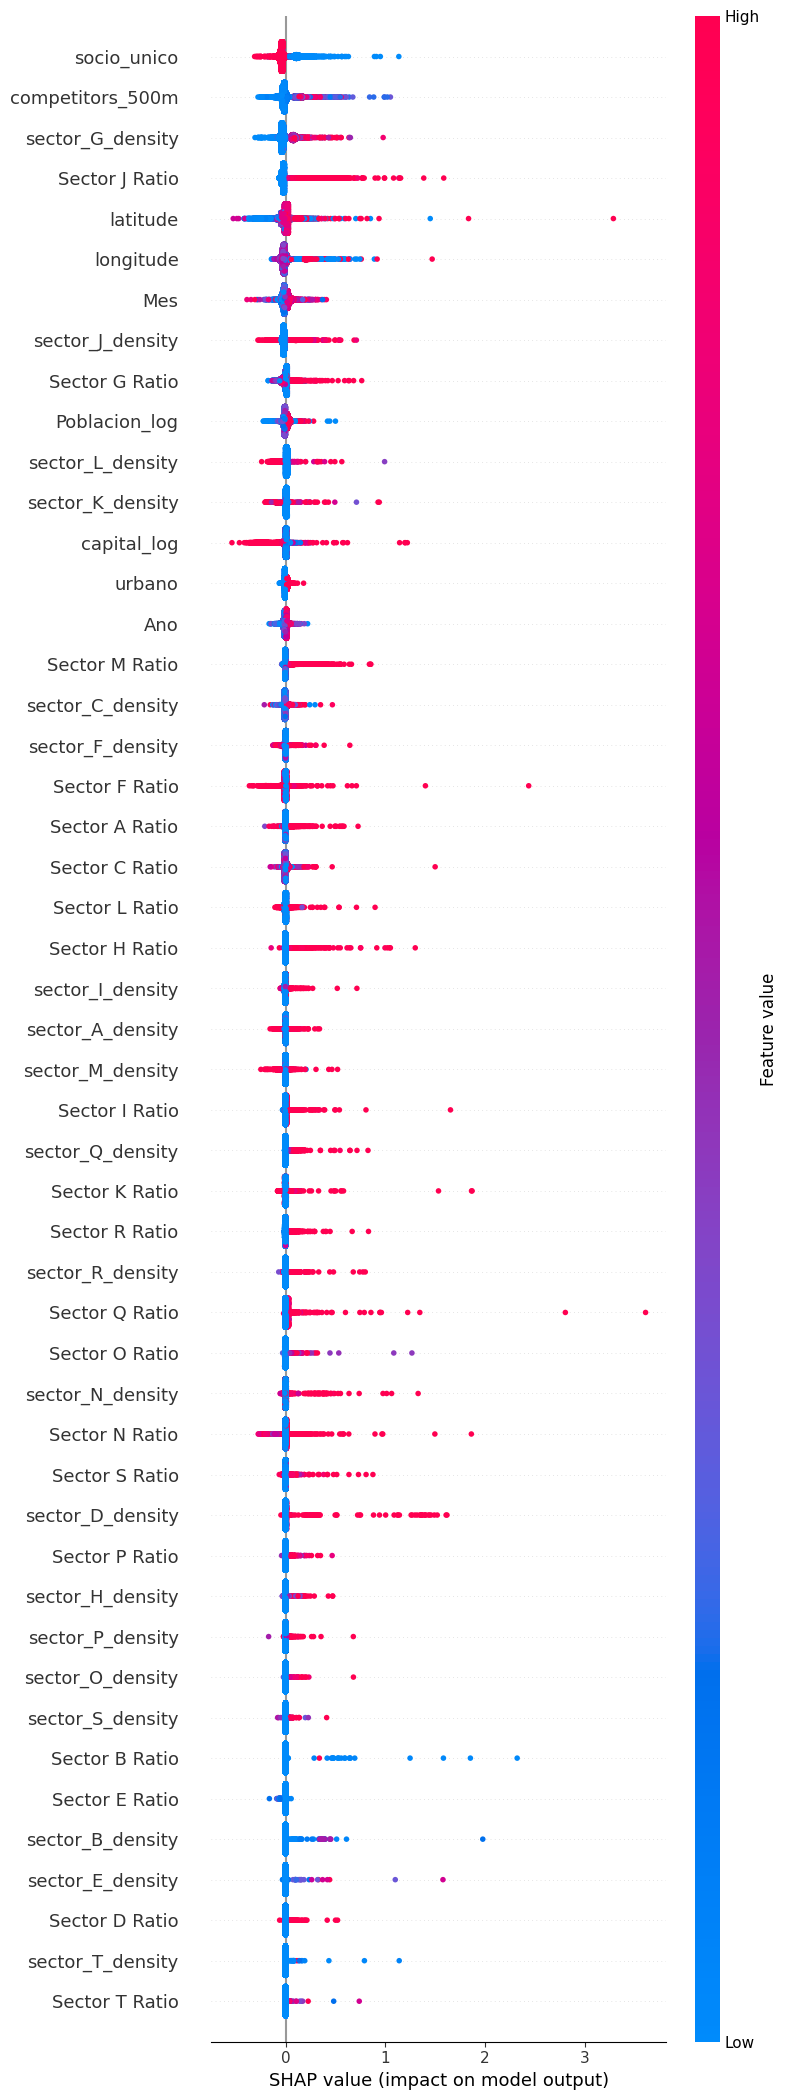

In [153]:
# Customize the summary plot to show more features
max_display_features = 49  # Increase this number as needed

# Create SHAP summary plot with customized number of features
shap.summary_plot(shap_values, X_train, max_display=max_display_features)
plt.show()

Survival Curves

In [156]:
# Predict survival functions for individual samples
#surv_funcs = model.predict_survival_function(X_test)
surv_funcs = gb_surv.predict_survival_function(X_test)

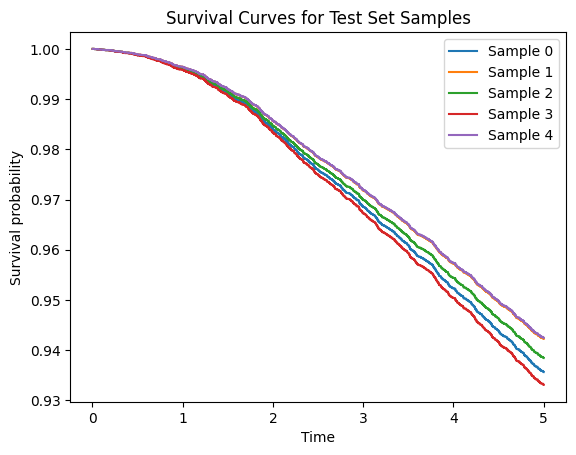

In [157]:
# Plot survival curves for some random samples
for i, surv_func in enumerate(surv_funcs[:5]):  # Plot for the first 5 individuals
    plt.step(surv_func.x, surv_func.y, where="post", label=f"Sample {i}")
plt.ylabel("Survival probability")
plt.xlabel("Time")
plt.title("Survival Curves for Test Set Samples")
plt.legend()
plt.show()